# **Installing Dependencies**

Installing `pycocotools`, a library for generating the evaluation metric: Intersection Over Union (IOU) based on the COCO metric. 

In [1]:
%%shell

pip install cython
pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-nk45pcik
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-nk45pcik
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275269 sha256=acd268eeaaac213cdb833f30126974b68fb25995e06eee41bf242dd8d808fe04
  Stored in directory: /tmp/pip-ephem-wheel-cache-4mhknuru/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.0
    Uninstalling pycocotools-2.0.0:
      Successfully uninstalled pycocotools-2.0.0


Helper functions from https://github.com/pytorch/vision.git for training and evaluation. The functions included are: `references/detection/engine.py`, `references/detection/utils.py` and `references/detection/transforms.py`

In [2]:
%%shell

# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 7950 (delta 12), reused 10 (delta 4), pack-reused 7914
Receiving objects: 100% (7950/7950), 10.13 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (5426/5426), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be37608 version check against PyTorch's CUDA version


# **Defining Dataset and Dataloader**

### **Load dataset from drive**

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
cd "/content/drive/My Drive/522 Project/Datasets/Non_DL_baseline_1"

/content/drive/My Drive/522 Project/Datasets/Non_DL_baseline_1


### **Example of an image from the generated dataset**

rgb image shape:  (128, 128, 3)


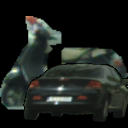

In [7]:
from PIL import Image
import numpy as np

rgb_img = Image.open('Rgbs/127_all_rgb.png')
print("rgb image shape: ", np.array(rgb_img).shape)
rgb_img

### **The segmentation ground truth masks of both object instances**

background mask shape:  (128, 128, 4)


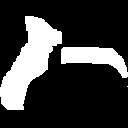

In [8]:
bg_mask = Image.open('Masks/127_back_mask_generated.png')
print("background mask shape: ", np.array(bg_mask).shape)
bg_mask

background mask shape:  (128, 128, 4)


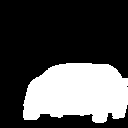

In [9]:
fg_mask = Image.open('Masks/127_fore_mask.png')
print("background mask shape: ", np.array(fg_mask).shape)
fg_mask

### **DELETE THIS**

In [0]:
# import os
# import glob

# root = "/content/drive/My Drive/522 Project/Datasets/Generated"

# imgs = list(sorted(os.listdir(os.path.join(root, "Rgbs"))))
# print(len(imgs))

# #masks
# masks_dir = os.path.join(root, "Masks")
# bg_masks = []
# fg_masks = []

# for fname in glob.glob(masks_dir + "/*_back_mask_generated.png"):
#   bg_masks.append(fname)
# bg_masks = sorted(bg_masks)
# print(len(bg_masks))

# for fname in glob.glob(masks_dir + "/*_fore_mask.png"):
#   fg_masks.append(fname)
# fg_masks = sorted(fg_masks)
# print(len(fg_masks))
# idx = 0

# img_path = os.path.join(root, "Rgbs", imgs[idx])
# bg_mask_path = os.path.join(root, "Masks", bg_masks[idx])
# fg_mask_path = os.path.join(root, "Masks", fg_masks[idx])

# print(img_path)
# print(bg_mask_path)
# print(fg_mask_path)

In [0]:
# print(bg_masks[0])

In [0]:
# # TEST
# bitmap1 = np.zeros((1501))
# bitmap2 = np.zeros((1501))
# bitmap3 = np.zeros((1501))
# imgstest = list(sorted(os.listdir(os.path.join(root, "Masks"))))
# print(len(imgstest))
# # print(imgstest[0])
# # print(imgstest[1])
# # print(imgstest[2])
# for img11 in imgstest:
#   tmp = str(img11)
#   splits=tmp.split('_')
#   x = int(splits[0])
#   first = splits[1]
#   if(first == "fore"):
#     bitmap1[x] = 1
#   elif(first == "back"):
#     third = splits[3]
#     if(third == "gt.png"):
#       bitmap2[x]=1
#     elif(third == "generated.png"):
#       bitmap3[x]=1
#     else:
#       print("found some other suffix for back at index ",x)
#   else:
#     print("found some other first apart from back and fore")
  





In [0]:
# print(np.argwhere(bitmap3==0))

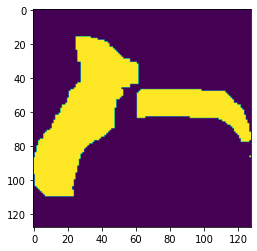

(128, 128)
(2, 128, 128)
tensor([[ 23.,  63., 127., 122.],
        [  0.,  16., 127., 109.]])


In [13]:
#For playing around. Remove from final submission
import torch

import matplotlib.pyplot as plt

def combine_mask(fg_mask, bg_mask):
  fg_1d = get1dmask(fg_mask)
  bg_1d = get1dmask(bg_mask)
  combined = np.stack((fg_1d, bg_1d), axis = 0)

  return combined

def get1dmask(mask):
  non_zero_vals = mask > 0
  zero_vals = mask == 0
  mask[non_zero_vals] = 1
  mask[zero_vals] = 0

  return mask[:,:,0]

new_mask = get1dmask(np.array(bg_mask))
plt.imshow(new_mask)
plt.show()
print(new_mask.shape)

combined = combine_mask(np.array(fg_mask) , np.array(bg_mask))
print(combined.shape)

boxes = []
for i in range(2):
  pos = np.where(combined[i])
  xmin = np.min(pos[1])
  xmax = np.max(pos[1])
  ymin = np.min(pos[0])
  ymax = np.max(pos[0])
  boxes.append([xmin, ymin, xmax, ymax])  

boxes = torch.as_tensor(boxes, dtype=torch.float32)
print(boxes)


### **`torch.utils.data.Dataset` class for this dataset**

In [0]:
import os
import numpy as np
import torch
import torch.utils.data
import glob
from PIL import Image
import matplotlib.pyplot as plt

class SceneCompositionDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None, ground_truth = True):
        self.root = root #should be the path to directory "Generated" in drive
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(self.root, "Rgbs"))))
        #load background and foreground masks
        masks_dir = os.path.join(root, "Masks")
        bg_masks = []
        fg_masks = []

        if (ground_truth):
          for fname in glob.glob(masks_dir + "/*_back_mask_gt.png"):
            bg_masks.append(fname)
          self.bg_masks = sorted(bg_masks)
        else:
          for fname in glob.glob(masks_dir + "/*_back_mask_generated.png"):
            bg_masks.append(fname)
          self.bg_masks = sorted(bg_masks)

        for fname in glob.glob(masks_dir + "/*_fore_mask.png"):
          fg_masks.append(fname)
        self.fg_masks = sorted(fg_masks)

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "Rgbs", self.imgs[idx])
        # print(img_path)
        img = Image.open(img_path).convert("RGB")
        bg_mask_path = os.path.join(self.root, "Masks", self.bg_masks[idx])
        fg_mask_path = os.path.join(self.root, "Masks", self.fg_masks[idx])

        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        bg_mask = Image.open(bg_mask_path)
        fg_mask = Image.open(fg_mask_path)

        bg_mask = np.array(bg_mask)
        bg_mask = bg_mask[:,:,:3]
        fg_mask = np.array(fg_mask)
        fg_mask = fg_mask[:,:,:3]

        # split the color-encoded mask into a set
        # of binary masks
        masks = self.combine_mask(fg_mask, bg_mask)

        #id for each object instance in the image. (2 for all images currently)
        obj_ids = range(len(masks))        

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        # import pdb; pdb.set_trace()
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax]) 
        # import pdb; pdb.set_trace() 

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

    def combine_mask(self, fg_mask, bg_mask):
        fg_1d, fg_flag = self.get1dmask(fg_mask)
        bg_1d, bg_flag = self.get1dmask(bg_mask)
        if (fg_flag and bg_flag):
          combined = np.stack((fg_1d, bg_1d), axis = 0)
        elif fg_flag:
          combined = fg_1d[None,:,:]
        elif bg_flag:
          combined = bg_1d[None,:,:]

        return combined

    def get1dmask(self, mask):
        non_zero_vals = mask > 0
        is_there = True
        check = np.sum(non_zero_vals)
        if check == 0:
          is_there = False
        zero_vals = mask == 0

        mask[non_zero_vals] = 1
        mask[zero_vals] = 0
        
        if is_there == True:
          area = self.getArea(mask)
          if area < 1000:
            is_there = False
        return mask[:,:,0], is_there

    def getArea(self, mask):
        pos = np.where(mask[:,:,0])
        xmin = np.min(pos[1])
        xmax = np.max(pos[1])
        ymin = np.min(pos[0])
        ymax = np.max(pos[0])

        area = (xmax - xmin)*(ymax - ymin)

        return area


1501
1501
1501


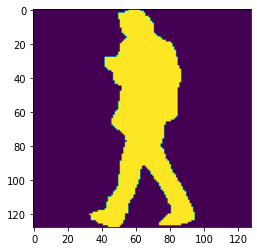

In [15]:
dataset = SceneCompositionDataset('/content/drive/My Drive/522 Project/Datasets/Generated', ground_truth=True)
print(len(dataset.imgs))
print(len(dataset.bg_masks))
print(len(dataset.fg_masks))
dataset[397][0]
plt.imshow(dataset[397][1]['masks'][1])

### **DELETE THIS**

In [0]:
# for i in range((301)):
#   print(i)
#   sample = dataset[i]
#   area_vals = sample[1]['area']
#   for j in range(len(area_vals)):
#     val = area_vals[j].item()
#     if val < 2500:
#       print("Small pixel area found at %d with j= %d and area = %f" %(i, j, val))
#       # print(i)
#   if np.array(sample[0]) is None:
#     print("None image encountered at %d" %(i))

# **Defining the Model**

### **A pre-trained Mask-RCNN (trained on COCO dataset) from `torchvision` is used for segmentation.**

In [0]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

def get_instance_segmentation_model(num_classes):
  # load an instance segmentation model pre-trained pre-trained on COCO
  model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

  # get the number of input features for the classifier
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  print("Num. of input features for the classifier: ", in_features)

  # replace the pre-trained head with a new one
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

  # now get the number of input features for the mask classifier
  in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
  print("Num. of input features for the segmentation part: ",in_features_mask)

  #and replace the mask predictor with a new one
  hidden_layer = 256
  model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,hidden_layer,num_classes)

  return model

### Function for data augmentation/transformation using `references/detection`

In [0]:
from engine import train_one_epoch, evaluate
import utils
import transforms as T


def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    # if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        # transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

### Test if forward() function is throwing any error

In [20]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

dataset = SceneCompositionDataset('/content/drive/My Drive/522 Project/Datasets/Generated',
                           get_transform(train=True), ground_truth = True)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, num_workers=0,
                                          collate_fn=utils.collate_fn)

# For Training
images,targets = next(iter(data_loader))
print(len(images))
print(len(targets))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images,targets)   # Returns losses and detections

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)           # Returns predictions

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



2
2


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


### **Putting everything together**

In [27]:
# use our dataset and defined transformations
root = '/content/drive/My Drive/522 Project/Datasets/Non_DL_baseline_1'
dataset = SceneCompositionDataset(root , get_transform(train=True), ground_truth=False)
dataset_test = SceneCompositionDataset(root, get_transform(train=False), ground_truth=True)

# # split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
print(len(indices))
print(indices)
#1300, 200 ours
# 400,100 baselines
dataset = torch.utils.data.Subset(dataset, indices[0:-200])
print(len(dataset))
dataset_test = torch.utils.data.Subset(dataset_test, indices[-200:])
print(len(dataset_test))

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=0,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

500
[345, 58, 404, 251, 227, 303, 351, 142, 235, 390, 448, 323, 200, 431, 441, 415, 302, 377, 170, 177, 50, 489, 36, 435, 467, 126, 420, 473, 321, 366, 98, 358, 155, 309, 343, 278, 475, 84, 364, 484, 165, 388, 17, 417, 24, 130, 80, 179, 225, 0, 314, 277, 124, 125, 259, 238, 91, 412, 11, 3, 466, 56, 485, 32, 429, 368, 327, 369, 312, 5, 33, 460, 244, 173, 156, 198, 67, 233, 279, 146, 13, 411, 100, 326, 4, 63, 129, 148, 470, 380, 110, 349, 261, 77, 14, 482, 69, 18, 82, 87, 153, 319, 94, 497, 288, 171, 152, 313, 315, 451, 363, 237, 409, 488, 53, 16, 446, 464, 106, 97, 332, 266, 22, 151, 62, 454, 112, 414, 204, 265, 159, 337, 216, 372, 354, 31, 236, 389, 465, 287, 371, 128, 452, 310, 328, 249, 88, 203, 248, 21, 405, 463, 176, 180, 72, 395, 478, 167, 70, 399, 275, 461, 201, 99, 301, 134, 422, 196, 260, 73, 186, 150, 378, 490, 459, 408, 242, 264, 181, 239, 104, 339, 103, 479, 386, 410, 26, 286, 74, 316, 350, 280, 331, 15, 496, 158, 178, 256, 160, 46, 133, 60, 428, 247, 393, 445, 291, 290, 42,

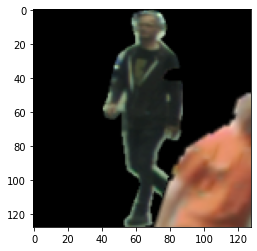

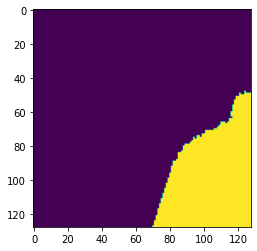

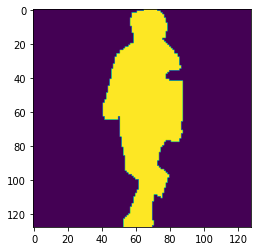

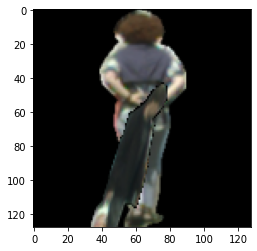

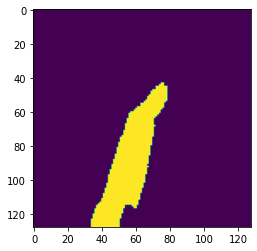

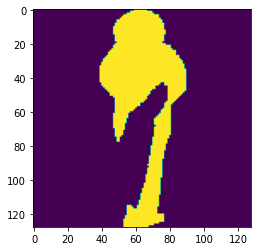

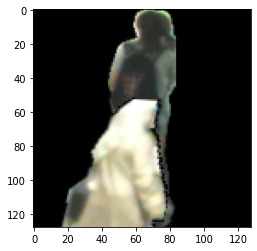

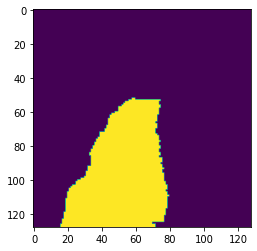

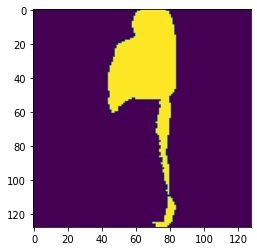

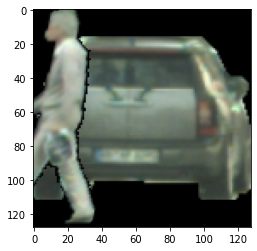

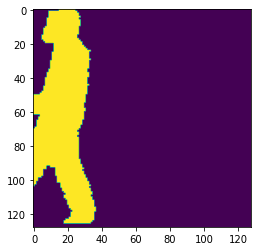

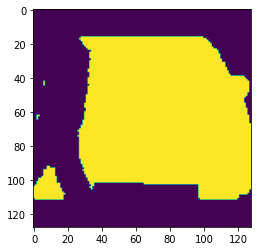

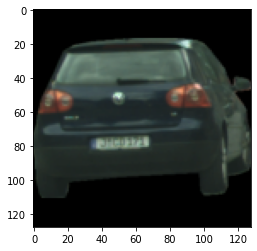

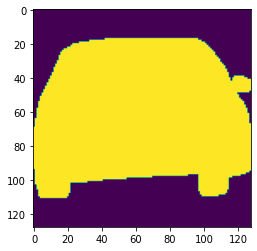

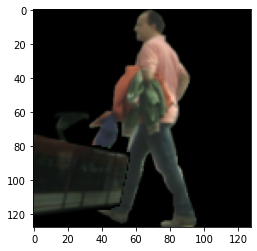

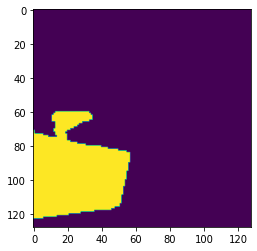

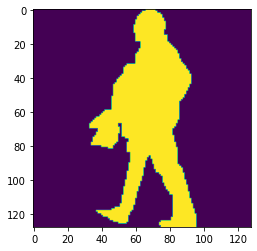

In [28]:
for i in range(len(dataset)):
  img = dataset[i][0]
  gt = dataset[i][1]
  # print(gt)
  plt.imshow(Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy()))
  plt.show()
  for j in range(len(gt['masks'])):
    plt.imshow(gt['masks'][j])
    plt.show()
  
  if i == 5:
    break

In [29]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

Num. of input features for the classifier:  1024
Num. of input features for the segmentation part:  256


In [30]:
print(device)

cuda:0


### **Training Loop**

In [31]:
# let's train it for 10 epochs
# epoch -> 7 ours
# epoch ->5 baselines
num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Epoch: [0]  [  0/150]  eta: 0:08:47  lr: 0.000039  loss: 2.9981 (2.9981)  loss_classifier: 0.7885 (0.7885)  loss_box_reg: 0.1670 (0.1670)  loss_mask: 2.0228 (2.0228)  loss_objectness: 0.0062 (0.0062)  loss_rpn_box_reg: 0.0136 (0.0136)  time: 3.5181  data: 3.0247  max mem: 2151
Epoch: [0]  [ 10/150]  eta: 0:07:41  lr: 0.000374  loss: 2.1492 (2.0972)  loss_classifier: 0.6121 (0.5271)  loss_box_reg: 0.1491 (0.1572)  loss_mask: 1.3071 (1.3907)  loss_objectness: 0.0064 (0.0081)  loss_rpn_box_reg: 0.0129 (0.0140)  time: 3.2996  data: 2.8078  max mem: 2427
Epoch: [0]  [ 20/150]  eta: 0:07:15  lr: 0.000709  loss: 1.2786 (1.4879)  loss_classifier: 0.2024 (0.3673)  loss_box_reg: 0.1364 (0.1471)  loss_mask: 0.7400 (0.9509)  loss_objectness: 0.0064 (0.0086)  loss_rpn_box_reg: 0.0095 (0.0140)  time: 3.3389  data: 2.8425  max mem: 2427
Epoch: [0]  [ 30/150]  eta: 0:06:38  lr: 0.001044  loss: 0.7133 (1.2292)  loss_classifier: 0.1659 (0.2907)  loss_box_reg: 0.1342 (0.1401)  loss_mask: 0.3907 (0.7762) 

### **Testing**

In [0]:
torch.save(model.state_dict(), "/content/drive/My Drive/522 Project/Saved Models/NonDLBaseline_500sample_5epoch_partial.pth")




# model.load_state_dict(torch.load("/content/drive/My Drive/522 Project/Saved Models/DLBaseline_300sample_5epoch.pth"))
# model.to(device)

In [0]:
# model.load_state_dict(torch.load("/content/drive/My Drive/522 Project/Saved Models/DLBaseline_300sample_5epoch.pth"))
# model.to(device)

Testing a single image from test set

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


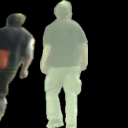

In [34]:
# pick one image from the test set

img, _ = dataset_test[20]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

In [35]:
prediction

[{'boxes': tensor([[ 40.9960,   1.7947,  86.8291, 126.3148],
          [  0.1738,  12.8877,  34.2920, 119.6651],
          [  1.3409,  11.2704,  18.4829, 128.0000]], device='cuda:0'),
  'labels': tensor([1, 1, 1], device='cuda:0'),
  'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
  
  
          [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000, 

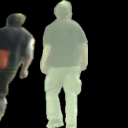

In [36]:
Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

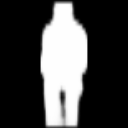

In [37]:
Image.fromarray(prediction[0]['masks'][0, 0].mul(255).byte().cpu().numpy())

### **Evaluation on test set**

In [0]:
def calculate_IoU(dataset, model):
  IoUFGs= np.zeros((len(dataset)))
  IoUBGs= np.zeros((len(dataset)))
  numPredictions = np.zeros((len(dataset)))
  numGroundTruths = np.zeros((len(dataset)))

  for i in range(len(dataset)):
    img, gt = dataset[i]
    model.eval()
    with torch.no_grad():
      pred = model([img.to(device)])
    assert(len(pred)==1)
    numGtMasks = len(gt['masks'])
    numPredMasks = len(pred[0]['masks'])
    numPredictions[i] = numPredMasks
    numGroundTruths[i] = numGtMasks
    if(numPredMasks<numGtMasks):
      print("false negative")
    # print("ground truth masks num: ", numGtMasks)
    # print("prediction masks num: ", numPredMasks)
    IoUList = []
    for maskGt in gt['masks']:
      for maskPred in pred[0]['masks']:
        # plt.imshow(Image.fromarray(maskGt.numpy()))
        # plt.show()
        maskPred = maskPred.squeeze()
        # plt.imshow(maskPred.cpu().numpy())
        # plt.show()
        maskUnion = maskPred.cpu().numpy() + maskGt.cpu().numpy()
        maskUnion[maskUnion>=1] = 1
        maskIntersection = maskPred.cpu().numpy() * maskGt.cpu().numpy()
        IoUList.append(np.sum(maskIntersection)/np.sum(maskUnion))
        # print(np.sum(maskIntersection)/np.sum(maskUnion))
    # print(len(IoUList))
    # IoUList.sort()
    val1 = max(IoUList)
    IoUList.remove(val1)
    if(len(IoUList)>1):
      val2 = max(IoUList)
    IoUList.append(val1)    
    if(len(IoUList)>1):
      if(numGtMasks==1):
        IoUFGs[i]=(val1)
        IoUBGs[i]=(-2)
      else:
        IoUFGs[i]=(val1)
        IoUBGs[i]=(val2)
    else:
      IoUFGs[i]=(val1)
      IoUBGs[i]=(-1)
    if i%20 == 0:
      print(i)
  return IoUFGs, IoUBGs, numPredictions, numGroundTruths

In [0]:
def calculateMetrics(IoUFGs, IoUBGs, numGroundTruths, numPredictions):
  APs = []
  ARs = []

  thresholds = np.arange(start=0.5, stop = 0.95, step=0.05)
  for thresh in thresholds:
    print(thresh)
    IoUFG, IoUBG = np.array(IoUFGs), np.array(IoUBGs)
    numGroundTruths, numPredictions = np.array(numGroundTruths), np.array(numPredictions)

    new_IoUFGs = np.zeros(len(IoUFG))
    new_IoUBGs = np.zeros(len(IoUBG))
    new_IoUFGs[IoUFG >= thresh] = 1
    new_IoUFGs[IoUFG < thresh] = -1

    new_IoUBGs[np.logical_and(IoUBG >= 0, IoUBG <= thresh)] = -1
    new_IoUBGs[IoUBG >=thresh] = 1
    new_IoUBGs[new_IoUBGs < 0] = 0

    TP = new_IoUFGs + new_IoUBGs
    FP = numPredictions - TP
    FP[FP == -1] = 0
    FN = numGroundTruths - numPredictions
    FN[FN < 0] = 0
    Precision = TP/(TP + FP)
    # summ = TP + FN
    Recall = TP/(TP + FN)
    Recall[np.argwhere(np.isnan(Recall))] = 0
    Recall[np.argwhere(np.isinf(Recall))] = 0

    APs.append(np.sum(Precision)/len(Precision))
    ARs.append(np.sum(Recall)/len(Recall))

  return APs, ARs

In [40]:
IoUFG_test, IoUBG_test, numPredictions, numGroundTruths = calculate_IoU(dataset_test, model)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


0
20
false negative
40
60
80
100
120
140
160
180


In [41]:
a,b = calculateMetrics(IoUFG_test, IoUBG_test, numGroundTruths, numPredictions)
print(a)
print(sum(a)/len(a))
print(b)

0.5
0.55
0.6000000000000001
0.6500000000000001
0.7000000000000002
0.7500000000000002
0.8000000000000003
0.8500000000000003
0.9000000000000004
[0.683595238095238, 0.6569285714285715, 0.6345119047619048, 0.5811785714285714, 0.5454285714285715, 0.5050119047619048, 0.44009523809523804, 0.3245119047619048, 0.07532142857142857]
0.49406481481481485
[0.9983333333333333, 0.9983333333333333, 0.9983333333333333, 0.9983333333333333, 0.9983333333333333, 0.9975, 0.995, 0.995, 0.995]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
